In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt

import acquire as acq

## Jump To:
### [Store Data](#store)  --  [function testing](#storefunc)
### [OPSD Data](#opsd)  --  [function testing](#opsdfunc)


## Store Data <a class="anchor" id="store" />

In [2]:
#grab the data
df = acq.get_HEB_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_id        913000 non-null  int64  
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
 9   item_upc12     913000 non-null  int64  
 10  item_upc14     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_id       913000 non-null  int64  
 14  store_state    913000 non-null  object 
 15  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ MB


##### Convert Date Column to datetime format and set as index (#1 and 3)

In [4]:
df.head(3)

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [5]:
df.iloc[0:3,0:3]

,item,sale_amount,sale_date
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT"
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT"
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT"


In [6]:
#See if all 00:00:00 GMT
df.sale_date.str.endswith("00:00:00 GMT").mean()

1.0

In [7]:
#Convert date column to datetime format - test the first row
pd.to_datetime("Tue, 01 Jan 2013 00:00:00 GMT",format="%a, %d %b %Y %X %Z")

Timestamp('2013-01-01 00:00:00+0000', tz='GMT')

In [8]:
#try others:
pd.to_datetime("Tue, 01 Jan 2013 00:00:00 GMT",format="%a, %d %b %Y 00:00:00 GMT")

Timestamp('2013-01-01 00:00:00')

In [9]:
len("Tue, 01 Jan 2013")

16

In [10]:
len(" 00:00:00 GMT")

13

In [11]:
test = "Tue, 01 Jan 2013 00:00:00 GMT"
test[:-13]

'Tue, 01 Jan 2013'

In [12]:
df.sale_date = df.sale_date.apply(lambda date: date[:-13])

In [13]:
df.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [14]:
#Now convert column
df.sale_date = pd.to_datetime(df.sale_date,format="%a, %d %b %Y")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item           913000 non-null  int64         
 1   sale_amount    913000 non-null  float64       
 2   sale_date      913000 non-null  datetime64[ns]
 3   sale_id        913000 non-null  int64         
 4   store          913000 non-null  int64         
 5   item_brand     913000 non-null  object        
 6   item_id        913000 non-null  int64         
 7   item_name      913000 non-null  object        
 8   item_price     913000 non-null  float64       
 9   item_upc12     913000 non-null  int64         
 10  item_upc14     913000 non-null  int64         
 11  store_address  913000 non-null  object        
 12  store_city     913000 non-null  object        
 13  store_id       913000 non-null  int64         
 14  store_state    913000 non-null  object        
 15  

In [15]:
#set as index 
df = df.set_index('sale_date').sort_index()

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='sale_date', length=913000, freq=None)

##### Plot distribution of sale_amount and item_price

<AxesSubplot:>

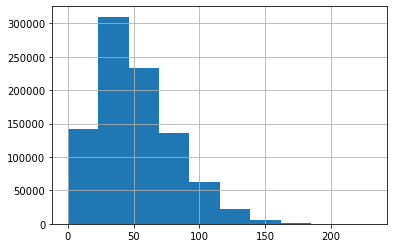

In [17]:
df.sale_amount.hist()

<AxesSubplot:>

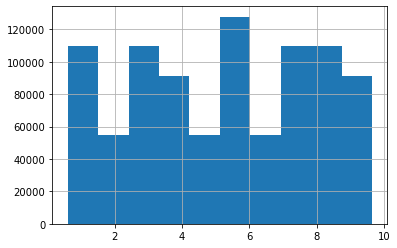

In [18]:
df.item_price.hist()

##### Add a month and day of week column

In [19]:
#create month in format 01-Jan. Autosorts columns in order and allows for more user-friendly string display
df['month'] = df.index.strftime(date_format="%m-%b")
#Do the same styel for day of week
df['dayofweek'] = df.index.strftime(date_format="%w-%a")

In [20]:
df[['month','dayofweek']].head()

,month,dayofweek
sale_date,,
2013-01-01,01-Jan,2-Tue
2013-01-01,01-Jan,2-Tue
2013-01-01,01-Jan,2-Tue
2013-01-01,01-Jan,2-Tue
2013-01-01,01-Jan,2-Tue


##### Add a column sales_total (derived from sale_amount and item_price)

In [21]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,dayofweek
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,01-Jan,2-Tue
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,01-Jan,2-Tue
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue


In [22]:
#Check if sale amount is always even:
(df.sale_amount % 1).value_counts()

0.0    913000
Name: sale_amount, dtype: int64

In [23]:
#^^Always even, so its a quantity, not a $ amount
#rename sale_amount b/c that's just confusing
df.rename(columns={'sale_amount':'quantity'},inplace=True)

#create sales_total
df['sales_total'] = df.quantity * df.item_price



<AxesSubplot:>

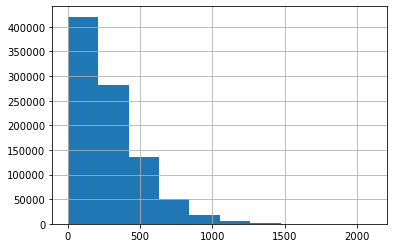

In [24]:
df.sales_total.hist()

<AxesSubplot:>

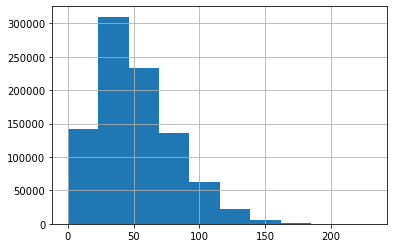

In [25]:
df.quantity.hist()

##### Drop into a function for prepare.py

In [26]:
def prep_HEB_data(df):
    #Drop the time and timezone, Convert sale date to datetime then store as index
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date,format="%a, %d %b %Y")
    df = df.set_index('sale_date').sort_index()
    #create month/day of week in format 01-Jan and 1-Mon. Autosorts columns in order and allows for more user-friendly string display
    df['month'] = df.index.strftime(date_format="%m-%b")
    df['dayofweek'] = df.index.strftime(date_format="%w-%a")
    #rename sale_amount
    df.rename(columns={'sale_amount':'quantity'},inplace=True)
    #Calculate sale_total
    df['sales_total'] = df.quantity * df.item_price
    return df

#### Store Function Testing <a class="anchor" id="storefunc" />

In [27]:
import prepare as pr

In [28]:
df2 = acq.get_HEB_data()
df2 = prep_HEB_data(df2)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   quantity       913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_id        913000 non-null  int64  
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_id       913000 non-null  int64  
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
 15  month          913000 non-null  object 
 16  dayofweek      913000 non-null  object 
 17  sales_total  

In [30]:
df.head(2)

,item,quantity,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,01-Jan,2-Tue,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue,30.16


## OPS Data <a class="anchor" id="opsd" />

In [31]:
df = acq.get_OPSD_data()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [33]:
df.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


##### Plot distribution of variables

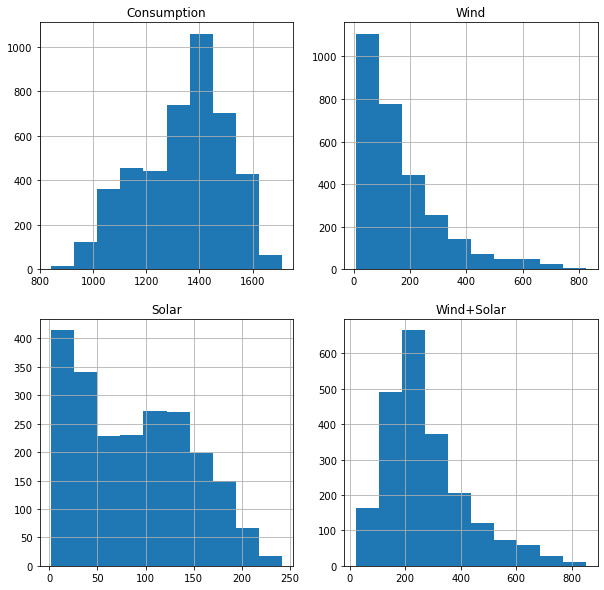

In [34]:
plt.figure(figsize=(10,10))
ct=0
for c in df.columns[1:]:
    ct+=1
    plt.subplot(2,2,ct)
    df[c].hist()
    plt.title(c)


##### Convert date to datetime format and set as index

In [35]:
#check month/day order
df.Date

0       2006-01-01
1       2006-01-02
2       2006-01-03
3       2006-01-04
4       2006-01-05
           ...    
4378    2017-12-27
4379    2017-12-28
4380    2017-12-29
4381    2017-12-30
4382    2017-12-31
Name: Date, Length: 4383, dtype: object

In [36]:
df.Date = pd.to_datetime(df.Date,format="%Y-%m-%d")
df = df.set_index('Date').sort_index()

In [37]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


##### Add a month and year column

In [38]:
df['month'] = df.index.strftime(date_format="%m-%b")
df['year'] = df.index.year

In [39]:
df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01-Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01-Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01-Jan,2006


##### Fill missing values

In [40]:
#Eww, rename wind+Solar
df.rename(columns={"Wind+Solar":"wind_solar","Wind":"wind","Solar":"solar"},inplace=True)

<AxesSubplot:xlabel='Date'>

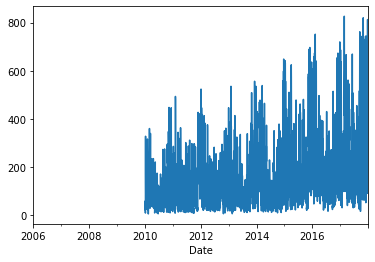

In [41]:
df.wind.plot()

<AxesSubplot:xlabel='Date'>

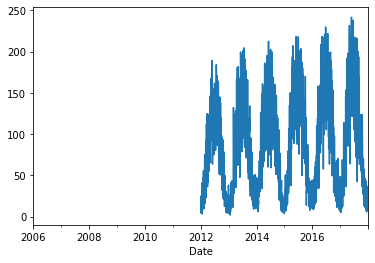

In [42]:
df.solar.plot()

<AxesSubplot:xlabel='Date'>

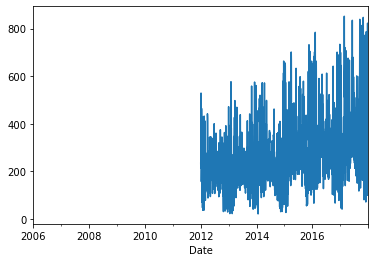

In [43]:
df.wind_solar.plot()

It looks like wind and solar may have nulls before those resources existed.  It also appears that wind+solar was only populated once both resources existed.  Checking a bit of that

In [44]:
df[df.wind.isna()].tail()

,Consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2009-12-29,1207.905,NaN,NaN,NaN,12-Dec,2009
2009-12-30,1192.196,NaN,NaN,NaN,12-Dec,2009
2009-12-31,1106.467,NaN,NaN,NaN,12-Dec,2009
2011-12-14,1531.311,NaN,NaN,NaN,12-Dec,2011
2014-03-12,1516.331,NaN,148.507,NaN,03-Mar,2014


In [45]:
df[df.solar.isna()].tail(10)

,Consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2011-12-26,1010.596,259.368,NaN,NaN,12-Dec,2011
2011-12-27,1206.980,153.273,NaN,NaN,12-Dec,2011
2011-12-28,1216.645,206.874,NaN,NaN,12-Dec,2011
2011-12-29,1226.888,415.505,NaN,NaN,12-Dec,2011
2011-12-30,1199.866,251.088,NaN,NaN,12-Dec,2011
2011-12-31,1077.625,83.185,NaN,NaN,12-Dec,2011
2013-03-30,1092.932,20.545,NaN,NaN,03-Mar,2013
2013-03-31,1002.856,39.624,NaN,NaN,03-Mar,2013
2014-03-29,1243.377,68.398,NaN,NaN,03-Mar,2014


In [46]:
df[df.wind_solar.isna()].tail(10)

,Consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2011-12-27,1206.980,153.273,NaN,NaN,12-Dec,2011
2011-12-28,1216.645,206.874,NaN,NaN,12-Dec,2011
2011-12-29,1226.888,415.505,NaN,NaN,12-Dec,2011
2011-12-30,1199.866,251.088,NaN,NaN,12-Dec,2011
2011-12-31,1077.625,83.185,NaN,NaN,12-Dec,2011
2013-03-30,1092.932,20.545,NaN,NaN,03-Mar,2013
2013-03-31,1002.856,39.624,NaN,NaN,03-Mar,2013
2014-03-12,1516.331,NaN,148.507,NaN,03-Mar,2014
2014-03-29,1243.377,68.398,NaN,NaN,03-Mar,2014


In [47]:
#Let's look at march 2014
df.loc['2014-03']

,Consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2014-03-01,1310.863,42.380,74.222,116.602,03-Mar,2014
2014-03-02,1205.382,79.034,58.509,137.543,03-Mar,2014
2014-03-03,1479.361,174.177,83.837,258.014,03-Mar,2014
2014-03-04,1521.878,19.160,70.862,90.022,03-Mar,2014
2014-03-05,1550.944,18.679,74.279,92.958,03-Mar,2014
2014-03-06,1546.473,54.556,91.283,145.839,03-Mar,2014
2014-03-07,1514.897,114.278,120.060,234.338,03-Mar,2014
2014-03-08,1279.162,107.357,131.284,238.641,03-Mar,2014
2014-03-09,1161.496,175.888,145.585,321.473,03-Mar,2014


**NULL NOTES:**
- Wind can be Zero through the end of 2009, then has two null values (2011-12-14, 2014-03-12)
- Solar can be Zero through the end of 2011, then has four null values (2013-03-30, 2013-03-31, 2014-03-29, 2014-03-30)
- Wind_Solar has nulls whenever wind or solar has a null

In [48]:
#Now check if wind+solar is just an additive column
df2 = df.loc["2015-01-01":]

In [49]:
(round(df2.wind_solar) == round(df2.wind + df2.solar)).mean() #so these columns are the same (if you round)

1.0

In [50]:
#Okay, we're good to just add zeros for all nulls in wind and solar, then just recreate the wind/solar column
df.fillna(0,inplace=True)
df.wind_solar = df.wind + df.solar

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 368.7+ KB


##### Drop into a function - BOOYAH

In [52]:
def prep_OPSD_data(df):
    #Convert date to datetime and set as index
    df.Date = pd.to_datetime(df.Date,format="%Y-%m-%d")
    df = df.set_index('Date').sort_index()
    #Create month and year column
    df['month'] = df.index.strftime(date_format="%m-%b")
    df['year'] = df.index.year
    #Rename other columns
    df.rename(columns={"Wind+Solar":"wind_solar","Wind":"wind","Solar":"solar"},inplace=True)
    #fill nulls as zero
    df.fillna(0,inplace=True)
    #recalculate wind_solar
    df.wind_solar = df.wind + df.solar
    return df

#### OPSD Function Testing <a class="anchor" id="opsdfunc" />

In [55]:
df = acq.get_OPSD_data()
df = prep_OPSD_data(df)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [57]:
df.head()

,Consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006
